In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from specim.specfuncs import spec1d

In [2]:
data =  spec1d.Spec1d('../0712_G0594_001_1d.txt')
lamda_galaxy = data['wav']
spectra_galaxy = data['flux']
variance_spectra_galaxy = data['var']
sky_spectra_galaxy = data['sky']


Reading spectrum from ../0712_G0594_001_1d.txt
Expected file format: text
 Spectrum Start:     0.00
 Spectrum End:     2045.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00



<IPython.core.display.Javascript object>


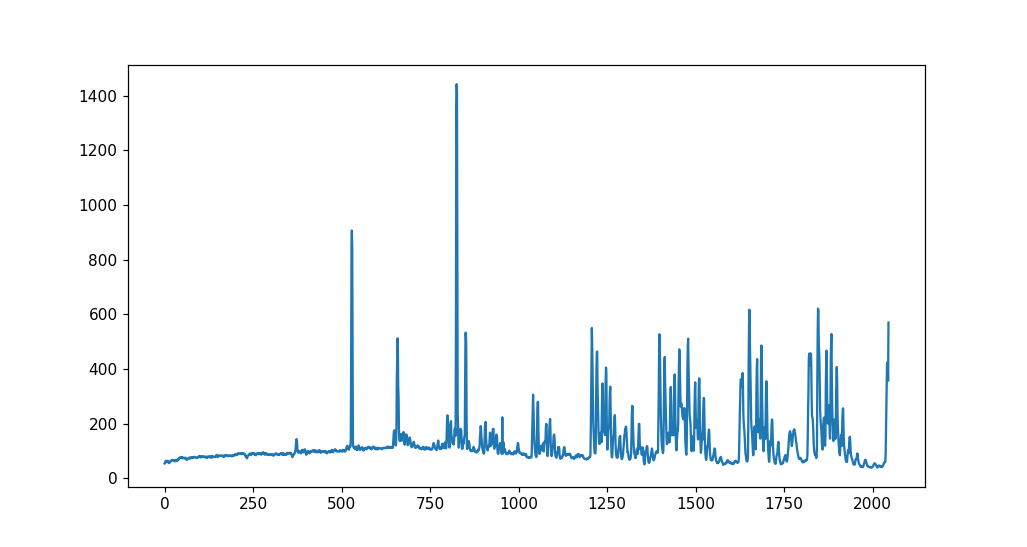

In [6]:
%matplotlib notebook
plt.plot(lamda_galaxy, sky_spectra_galaxy)